In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [20]:
def preprocess_data(filepath,num_classes=10):
    df=pd.read_csv(filepath)
    X=df.iloc[:,:-1].values.astype('float32')
    y=df['label'].values
    X/=255.0
    y=to_categorical(y,num_classes=num_classes)
    return X,y

In [21]:
X_train,y_train=preprocess_data('train_data.csv')
X_test,y_test=preprocess_data('test_data.csv')

In [22]:
model=Sequential([
    Flatten(input_shape=(3072,)),
    Dense(512,activation='relu',name='Hidden_layer_1'),
    Dense(256,activation='relu',name='Hidden_layer_2'),
    Dense(10,activation='softmax',name='Output_layer'),
])

model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print(model.summary())

C:\Users\UTKARSH BRAHMANKAR\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_layer_1 (Dense)               │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_layer_2 (Dense)               │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_layer (Dense)                 │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

None


In [23]:
H=model.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    epochs=11,
    batch_size=128,
    verbose=1
)

Epoch 1/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2523 - loss: 2.0808 - val_accuracy: 0.3326 - val_loss: 1.8807
Epoch 2/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3553 - loss: 1.8235 - val_accuracy: 0.3845 - val_loss: 1.7542
Epoch 3/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3901 - loss: 1.7480 - val_accuracy: 0.4089 - val_loss: 1.6983
Epoch 4/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4045 - loss: 1.6916 - val_accuracy: 0.4183 - val_loss: 1.6622
Epoch 5/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4246 - loss: 1.6491 - val_accuracy: 0.4018 - val_loss: 1.6858
Epoch 6/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4351 - loss: 1.6147 - val_accuracy: 0.4306 - val_loss: 1.6267
Epoch 7/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4465 - loss: 1.5833 - val_accuracy: 0.4333 - val_loss: 1.6022
Epoch 8/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4549 - loss: 1.5623 - val_accuracy: 0.

In [24]:
loss,accuracy=model.evaluate(X_test,y_test)
print('Test loss:' ,loss)
print ('Test Accuracy:',accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4532 - loss: 1.5670
Test loss: 1.5685632228851318
Test Accuracy: 44.999998807907104


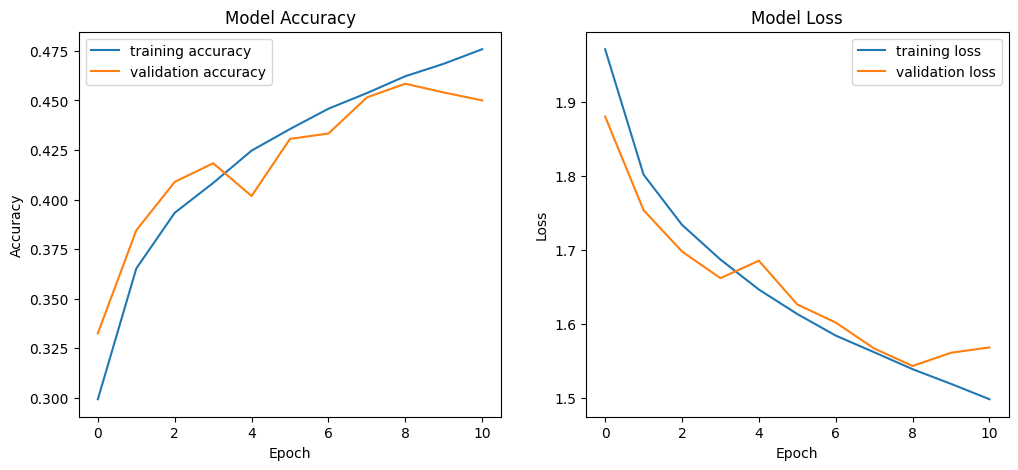

In [28]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(H.history['accuracy'],label='training accuracy')
plt.plot(H.history['val_accuracy'],label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(H.history['loss'],label='training loss')
plt.plot(H.history['val_loss'],label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()